In [13]:
# Library yang digunakan

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Membaca dataset

df = pd.read_excel('/content/teh.xlsx')
df.head()

,No,Blok,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Penyakit
0,1,B1,0,1,0,1,0,0,1,1,0,1,Busuk Daun
1,2,B2,1,0,1,0,1,1,0,0,0,0,Cacar Daun
2,3,B3,0,1,1,1,0,0,1,0,0,0,Busuk Daun
3,4,B4,1,0,1,1,0,0,1,0,0,0,Mati Ujung
4,5,B5,0,1,1,0,1,0,1,0,0,0,Cacar Daun


In [3]:
# Cek missing value

df.isna().sum()

No          0
Blok        0
C1          0
C2          0
C3          0
C4          0
C5          0
C6          0
C7          0
C8          0
C9          0
C10         0
Penyakit    0
dtype: int64

In [4]:
# Cek jumlah kolom dan baris

df.shape

(400, 13)

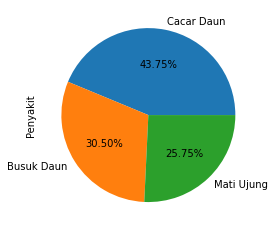

In [5]:
# Membuat jumah visualisasi dari masing-masing klasifikasi

data = df['Penyakit'].value_counts()
data.plot(kind='pie',autopct='%.2f%%')
plt.show() 

In [6]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

# Menyalin / copy dataframe agar dataframe awal tetap utuh
df = df.copy()

label = LabelEncoder()

# Membuat list dari nama kolom data kategori
categorical_data = ['Penyakit']

# Mengubah setiap data kategori menjadi numerik dengan encoder
for kolom in categorical_data:
  df[kolom] = label.fit_transform(df[kolom])

df.head()

,No,Blok,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Penyakit
0,1,B1,0,1,0,1,0,0,1,1,0,1,0
1,2,B2,1,0,1,0,1,1,0,0,0,0,1
2,3,B3,0,1,1,1,0,0,1,0,0,0,0
3,4,B4,1,0,1,1,0,0,1,0,0,0,2
4,5,B5,0,1,1,0,1,0,1,0,0,0,1


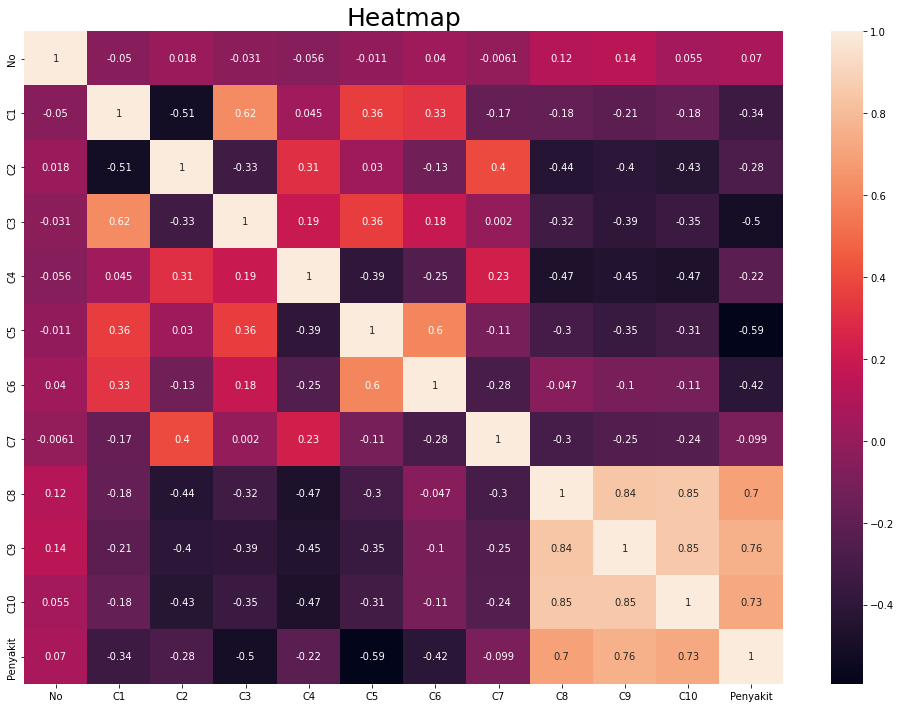

In [7]:
# Menampilkan korelasi antar variabel (gejala-gejala penyakit)

plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), annot=True, )
plt.title("Heatmap", fontsize = 25);
plt.show()

In [8]:
# Menentukan X & y
X = df.drop(['No', 'Blok' , 'Penyakit'], axis=1)
y = df['Penyakit']

Membuat dan menerapkan model C45 dalam pengklasfikasian 

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#from imblearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construct some pipelines


pipe_dt = Pipeline(steps=[('scaling',StandardScaler()), 
                          ('classifier', DecisionTreeClassifier
                           (random_state=42, max_depth=7, criterion='entropy'))])



pipes = [pipe_dt]
names_pipes = ['Hasil model C.45']

for i in range(len(pipes)):
  print(names_pipes[i])
  pipes[i].fit(X_train, y_train)
  y_pred = pipes[i].predict(X_test)
  print('\nAccuracy : ',accuracy_score(y_test, y_pred))
  print('\nConfusion Matrix : \n' , confusion_matrix(y_test, y_pred))

Hasil model C.45

Accuracy :  0.95

Confusion Matrix : 
 [[24  2  0]
 [ 0 37  0]
 [ 1  1 15]]
